<a href="https://colab.research.google.com/github/24Marko42/collab/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к
столбцам: «index», «year», «month», «day», «min_t», «average_t», «max_t»,
«rainfall».
Расшифровка:
• index – индекс ВМО,
• year – год,  
• month – месяц,  
• day – день,  
• min_t – минимальная температура воздуха,  
• average_t – средняя температура воздуха,  
• max_t – максимальная температура воздуха,  
• rainfall – количество осадков.


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
column_names = ['index', 'year', 'month', 'day', 'min_t', 'average_t', 'max_t', 'rainfall']

df = pd.read_csv('wr88125.txt', sep=';', header=None, names=column_names, usecols=range(len(column_names)))

print(df.head())

   index  year  month  day  min_t average_t  max_t rainfall
0  29838  1960      1    1   -6.9      -5.4   -3.8      0.1
1  29838  1960      1    2  -14.4     -10.0   -6.7      0.5
2  29838  1960      1    3  -21.7     -19.7  -13.4      0.0
3  29838  1960      1    4  -24.9     -21.4  -16.9      0.0
4  29838  1960      1    5  -18.3      -8.0   -3.3      4.1


2. Удалите столбец index.


In [12]:
df = df.drop('index', axis=1)

print(df.head())

   year  month  day  min_t average_t  max_t rainfall
0  1960      1    1   -6.9      -5.4   -3.8      0.1
1  1960      1    2  -14.4     -10.0   -6.7      0.5
2  1960      1    3  -21.7     -19.7  -13.4      0.0
3  1960      1    4  -24.9     -21.4  -16.9      0.0
4  1960      1    5  -18.3      -8.0   -3.3      4.1


3. Используя метод info(), oтветьте на вопросы:
3.1. Есть ли в данных пропущенные значения?
3.2. В каком столбце данных больше всего пропущенных значений?  


In [29]:
df.info()
missing_counts = df.isnull().sum()
print("\nКоличество пропущенных значений по столбцам:")
print(missing_counts)

# Ответы на вопросы:
has_missing = missing_counts.sum() > 0
print(f"\n3.1. Есть ли пропущенные значения? {'Да' if has_missing else 'Нет'}")
max_missing_col = missing_counts.idxmax()
print(f"3.2. Столбец с наибольшим числом пропусков: '{max_missing_col}' ({missing_counts[max_missing_col]} пропусков)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   22281 non-null  int64         
 1   month                  22281 non-null  int64         
 2   day                    22281 non-null  int64         
 3   min_t                  22255 non-null  float64       
 4   average_t              22255 non-null  float64       
 5   max_t                  21717 non-null  float64       
 6   rainfall               22253 non-null  float64       
 7   Date                   22281 non-null  datetime64[ns]
 8   temp_range             21715 non-null  float64       
 9   days_without_rainfall  22281 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 1.7 MB

Количество пропущенных значений по столбцам:
year                       0
month                      0
day       

4. В данных за какой год больше всего пропусков?  


In [17]:
for col in ['min_t', 'average_t', 'max_t', 'rainfall']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

missing_values_by_year = df.isnull().sum(axis=1).groupby(df['year']).sum()

year_with_most_missing = missing_values_by_year.idxmax()
max_missing_count = missing_values_by_year.max()

print(f"Год, в котором больше всего пропусков: {year_with_most_missing} (количество пропусков: {max_missing_count})")

df.info()

Год, в котором больше всего пропусков: 1961 (количество пропусков: 334)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       22281 non-null  int64  
 1   month      22281 non-null  int64  
 2   day        22281 non-null  int64  
 3   min_t      22255 non-null  float64
 4   average_t  22255 non-null  float64
 5   max_t      21717 non-null  float64
 6   rainfall   22253 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


5. Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в
формате гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь
формат datetime;


In [19]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

print(df.head())

df.info()

   year  month  day  min_t  average_t  max_t  rainfall       Date
0  1960      1    1   -6.9       -5.4   -3.8       0.1 1960-01-01
1  1960      1    2  -14.4      -10.0   -6.7       0.5 1960-01-02
2  1960      1    3  -21.7      -19.7  -13.4       0.0 1960-01-03
3  1960      1    4  -24.9      -21.4  -16.9       0.0 1960-01-04
4  1960      1    5  -18.3       -8.0   -3.3       4.1 1960-01-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       22281 non-null  int64         
 1   month      22281 non-null  int64         
 2   day        22281 non-null  int64         
 3   min_t      22255 non-null  float64       
 4   average_t  22255 non-null  float64       
 5   max_t      21717 non-null  float64       
 6   rainfall   22253 non-null  float64       
 7   Date       22281 non-null  datetime64[ns]
dtypes: datetime64[ns](1),

6. Для каждого наблюдения рассчитайте размах температур (разность
максимальной и минимальной суточных температур) и количество
предшествующих ему дней без осадков (используйте циклы Python и
условный оператор):


In [30]:
df['temp_range'] = df['max_t'] - df['min_t']

days_without_rainfall = []
consecutive_dry_days = 0

for i, row in df.iterrows():
    days_without_rainfall.append(consecutive_dry_days)
    if pd.isna(row['rainfall']) or row['rainfall'] > 0:
        consecutive_dry_days = 0
    elif row['rainfall'] == 0:
        consecutive_dry_days += 1

df['days_without_rainfall'] = days_without_rainfall

print(df.head())

df.info()

   year  month  day  min_t  average_t  max_t  rainfall       Date  temp_range  \
0  1960      1    1   -6.9       -5.4   -3.8       0.1 1960-01-01         3.1   
1  1960      1    2  -14.4      -10.0   -6.7       0.5 1960-01-02         7.7   
2  1960      1    3  -21.7      -19.7  -13.4       0.0 1960-01-03         8.3   
3  1960      1    4  -24.9      -21.4  -16.9       0.0 1960-01-04         8.0   
4  1960      1    5  -18.3       -8.0   -3.3       4.1 1960-01-05        15.0   

   days_without_rainfall  
0                      0  
1                      0  
2                      0  
3                      1  
4                      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   22281 non-null  int64         
 1   month                  22281 non-null  int64         
 2   d

7. Определите самый длинный период засухи.


In [23]:
longest_drought = df['days_without_rainfall'].max()

print(f"Самый длинный период засухи составил: {longest_drought} дней.")

Самый длинный период засухи составил: 27 дней.


8. Для каждого года вычислите среднегодовую температуру и общее количество
осадков. Запишите результаты в объекты Series.
8.1. Какой год можно считать самым теплым? Какой самым холодным?
8.2. В какой год выпало больше всего осадков? В какой меньше всего?  
Используя запись имя_серии.plot() вы можете построить график и
посмотреть как изменялась температура. С помощью имя_серии. .plot.bar()
можно отобразить на столбиковой диаграмме количество осадков,
выпавших в каждый год.


--- Среднегодовая температура ---
year
1960   -0.113934
1961    2.424384
1962    3.326849
1963    3.461264
1964    2.291803
Name: average_t, dtype: float64

--- Общее количество осадков ---
year
1960    472.7
1961    517.8
1962    368.7
1963    430.3
1964    425.3
Name: rainfall, dtype: float64

Самый теплый год: 2020 (4.78 °C)
Самый холодный год: 1969 (-0.56 °C)

Год с наибольшим количеством осадков: 1970 (576.10 мм)
Год с наименьшим количеством осадков: 1973 (258.00 мм)


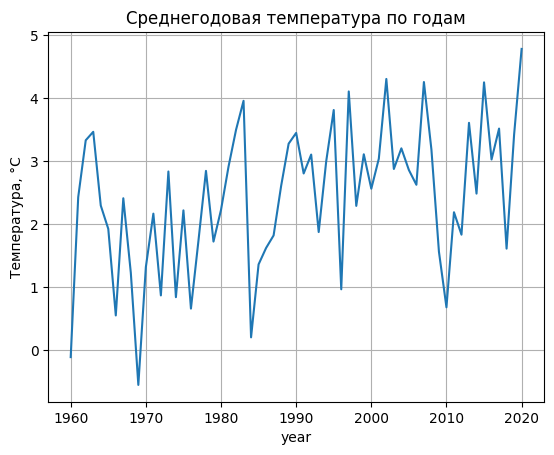

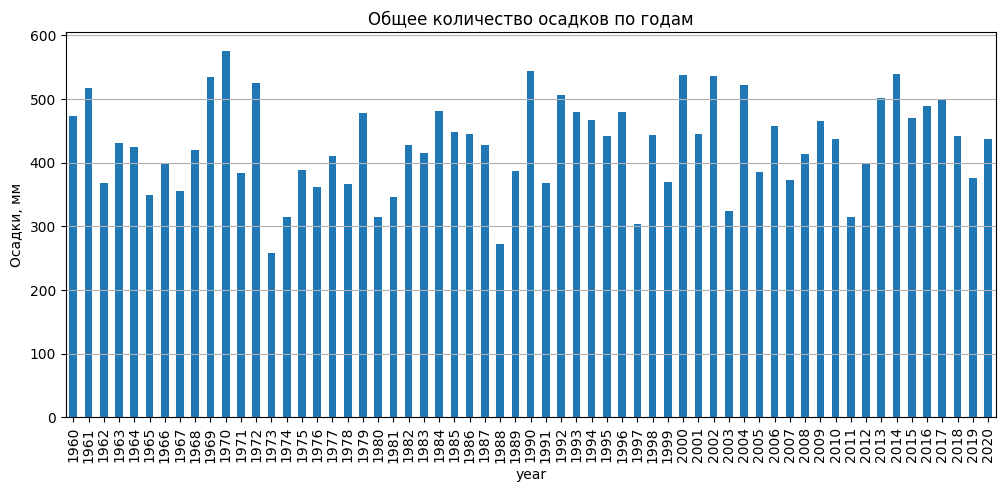

In [31]:
annual_avg_temp = df.groupby('year')['average_t'].mean()

annual_total_rainfall = df.groupby('year')['rainfall'].sum()

print("--- Среднегодовая температура ---")
print(annual_avg_temp.head())
print("\n--- Общее количество осадков ---")
print(annual_total_rainfall.head())

warmest_year = annual_avg_temp.idxmax()
coldest_year = annual_avg_temp.idxmin()
print(f"\nСамый теплый год: {warmest_year} ({annual_avg_temp.max():.2f} °C)")
print(f"Самый холодный год: {coldest_year} ({annual_avg_temp.min():.2f} °C)")

wettest_year = annual_total_rainfall.idxmax()
driest_year = annual_total_rainfall.idxmin()
print(f"\nГод с наибольшим количеством осадков: {wettest_year} ({annual_total_rainfall.max():.2f} мм)")
print(f"Год с наименьшим количеством осадков: {driest_year} ({annual_total_rainfall.min():.2f} мм)")

annual_avg_temp.plot(title='Среднегодовая температура по годам')
plt.ylabel('Температура, °C')
plt.grid(True)
plt.show()

annual_total_rainfall.plot.bar(title='Общее количество осадков по годам', figsize=(12, 5))
plt.ylabel('Осадки, мм')
plt.grid(axis='y')
plt.show()

9.  Выведете наблюдения, удовлетворяющие условиям:
9.1. Средняя температура воздуха ниже -30 оС (для некоторых регионов
можно использовать -10 оС, -35оС, -40 оС).  
9.2. Средняя температура воздуха выше 27оС и количество дней без осадков
больше 3.

In [25]:
cold_days = df[df['average_t'] < -30]
print("\n--- Наблюдения со средней температурой ниже -30 °C ---")
print(cold_days)

hot_dry_days = df[(df['average_t'] > 27) & (df['days_without_rainfall'] > 3)]
print("\n--- Наблюдения со средней температурой выше 27 °C и количеством дней без осадков более 3 ---")
print(hot_dry_days)


--- Наблюдения со средней температурой ниже -10 °C ---
       year  month  day  min_t  average_t  max_t  rainfall       Date  \
17     1960      1   18  -31.4      -31.2  -27.2       0.0 1960-01-18   
18     1960      1   19  -35.8      -33.2  -29.7       0.0 1960-01-19   
323    1960     11   19  -31.3      -30.1    NaN       0.8 1960-11-19   
361    1960     12   27  -34.2      -30.2    NaN       0.0 1960-12-27   
373    1961      1    8  -36.2      -34.5    NaN       0.0 1961-01-08   
...     ...    ...  ...    ...        ...    ...       ...        ...   
21585  2019      2    5  -38.0      -32.0  -24.3       0.0 2019-02-05   
21588  2019      2    8  -38.3      -32.8  -24.8       0.0 2019-02-08   
22275  2020     12   26  -35.5      -31.6  -23.4       0.0 2020-12-26   
22276  2020     12   27  -41.7      -36.3  -32.8       0.0 2020-12-27   
22277  2020     12   28  -40.1      -34.2  -25.5       0.0 2020-12-28   

       temp_range  days_without_rainfall  
17            4.2       